In [1]:
# Model 7- ELI & ROA
# Install all the required libraries 
!pip install xlrd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels.panel import PooledOLS
from scipy.stats.mstats import winsorize
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from linearmodels.panel import PanelOLS


In [129]:
#Import the file for analysis
excel_file='Final_For ELI & analysis2.xlsx'
csv_file='for_eli.csv'
dfl_roa=pd.read_excel(excel_file)
dfl_roa.to_csv(csv_file, index=False)

In [130]:
# Check the number of rows and type of data
dfl_roa

PrimaryUKSIC2007code  Unique code               Company_name  \
0                    11010           21                 DIAGEO PLC   
1                    11010           21                 DIAGEO PLC   
2                    11010           21                 DIAGEO PLC   
3                    11010           21                 DIAGEO PLC   
4                    11010           21                 DIAGEO PLC   
...                    ...          ...                        ...   
6006                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6007                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6008                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6009                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6010                 17211           72  SIMPAC (HOLDINGS) LIMITED   

     BvDIDnumber  Index1         ccc  No. of employees      Turnover  \
0     GB00023307       1  422.420052             27650  1.273300e+07   
1     GB00023307       2  446.042150             27775  1.175200e+07   
2     GB00023307       3  402.378004             28420  1.929400e+07   
3     GB00023307       4  398.703816             29917  1.843200e+07   
4     GB00023307       5  380.687843             30433  1.811400e+07   
...          ...     ...         ...               ...           ...   
6006  GBSC375176       6   65.436737               118  2.532855e+04   
6007  GBSC375176       7   62.883773               118  2.950795e+04   
6008  GBSC375176       8   54.823271               119  3.649827e+04   
6009  GBSC375176       9   58.328332               125  3.554272e+04   
6010  GBSC375176      10   66.395375               126  3.442253e+04   

      Average inventory      Firmsize  ...  Financial_leverage  Liquidity  \
0          5.908500e+06  3.195300e+07  ...            0.460896   1.602492   
1          5.622000e+06  3.330800e+07  ...            0.503933   1.765856   
2          5.243500e+06  3.129600e+07  ...            0.401169   1.338426   
3          4.901500e+06  2.971500e+07  ...            0.338449   1.366509   
4          4.683500e+06  2.884800e+07  ...            0.319780   1.299099   
...                 ...           ...  ...                 ...        ...   
6006       2.188609e+03  1.046680e+04  ...            0.049356   1.973843   
6007       2.471450e+03  1.052359e+04  ...            0.072644   1.811557   
6008       2.715799e+03  1.174810e+04  ...            0.134726   1.681820   
6009       2.991336e+03  1.237541e+04  ...            0.190395   1.716791   
6010       3.312689e+03  1.173277e+04  ...            0.267047   1.624776   

      Capital_intensity  Firm_growth  Short_term_financing  Asset_tangibility  \
0              2.562672     0.083475              0.223516           0.641818   
1              2.748639    -0.390899              0.195028           0.655608   
2              1.581087     0.046766              0.223767           0.700505   
3              1.588623     0.017555              0.214033           0.707521   
4              1.581208     0.158110              0.230865           0.700083   
...                 ...          ...                   ...                ...   
6006           0.414362    -0.141636              0.401610           0.207285   
6007           0.377385    -0.191525              0.449404           0.185880   
6008           0.330475     0.026884              0.510204           0.141929   
6009           0.339144     0.032542              0.513190           0.118961   
6010           0.349832    -0.226081              0.528886           0.140678   

      Date of incorporation  Firm_age_  Average_fixed_assets  log_fasset  
0                21/10/1886        138          1.892600e+07    7.277059  
1                21/10/1886        137          1.892600e+07    7.277059  
2                21/10/1886        136          1.892600e+07    7.277059  
3                21/10/1886        135          1.892600e+07    7.277059  
4                21/10/1886

In [131]:
# Check the number of rows and type of data
dfl_roa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6011 entries, 0 to 6010
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PrimaryUKSIC2007code    6011 non-null   int64  
 1   Unique code             6011 non-null   int64  
 2   Company_name            6011 non-null   object 
 3   BvDIDnumber             6011 non-null   object 
 4   Index1                  6011 non-null   int64  
 5   ccc                     5941 non-null   float64
 6   No. of employees        6011 non-null   int64  
 7   Turnover                6011 non-null   float64
 8   Average inventory       6011 non-null   float64
 9   Firmsize                6011 non-null   float64
 10  log_Tasset              6011 non-null   float64
 11  ROA                     6011 non-null   float64
 12  ROS                     6011 non-null   float64
 13  Profit                  6011 non-null   float64
 14  Inventory_turnover      6011 non-null   

In [132]:
# Generate the ELI
# Log tranform the Turnover & avg Inventory to run OLS regression

dfl_roa['log_turnover']=np.log(dfl_roa['Turnover'])
dfl_roa['log_average_inventory']=np.log(dfl_roa['Average inventory'])
dfl_roa['log_employees']=np.log(dfl_roa['No. of employees'])

In [133]:
dfl_roa.describe()

PrimaryUKSIC2007code   Unique code       Index1          ccc  \
count           6011.000000  6.011000e+03  6011.000000  5941.000000   
mean           21835.321910  2.218500e+07     5.500749    87.268762   
std             8153.497473  1.705788e+08     2.872868   106.722121   
min             8120.000000  1.100000e+01     1.000000   -79.111117   
25%            16100.000000  2.200000e+01     3.000000    41.123182   
50%            22290.000000  5.200000e+01     6.000000    70.275435   
75%            28220.000000  7.200000e+01     8.000000   105.156783   
max            46900.000000  1.333537e+09    10.000000  1989.505993   

       No. of employees      Turnover  Average inventory      Firmsize  \
count       6011.000000  6.011000e+03       6.011000e+03  6.011000e+03   
mean         808.602229  2.131982e+05       3.956926e+04  3.702343e+05   
std         5377.975125  1.662658e+06       3.362357e+05  3.544926e+06   
min            3.000000  3.391782e+03       1.045720e+02  1.881905e+03   
25%          112.000000  1.603978e+04       1.174202e+03  1.020178e+04   
50%          179.000000  2.582000e+04       2.564000e+03  1.708300e+04   
75%          309.000000  5.171080e+04       5.460364e+03  3.486525e+04   
max       101192.000000  3.411400e+07       5.971500e+06  8.043100e+07   

        log_Tasset          ROA  ...  Capital_intensity  Firm_growth  \
count  6011.000000  6011.000000  ...        6011.000000  6011.000000   
mean      4.379554     5.382080  ...           0.808001     0.064578   
std       0.599165     8.034841  ...           0.810378     0.205036   
min       3.274598   -80.870268  ...           0.146988    -0.784855   
25%       4.008676     1.682199  ...           0.488921    -0.025924   
50%       4.232564     4.796452  ...           0.636324     0.049540   
75%       4.542393     8.834691  ...           0.869706     0.135355   
max       7.905423    63.773807  ...          14.802047     4.093515   

       Short_term_financing  Asset_tangibility    Firm_age_  \
count           6011.000000        6011.000000  6011.000000   
mean               0.427383           0.384394    35.171852   
std                0.181229           0.188969    25.726682   
min                0.031133           0.000731     1.000000   
25%                0.297980           0.238107    17.000000   
50%                0.411233           0.373406    29.000000   
75%                0.547365           0.513404    44.000000   
max                1.366549           0.946401   138.000000   

       Average_fixed_assets   log_fasset  log_turnover  log_average_inventory  \
count          6.011000e+03  6011.000000   6011.000000            6011.000000   
mean           2.342587e+05     3.920703     10.453095               8.001109   
std            2.401786e+06     0.701197      1.182685               1.474724   
min            1.366000e+02     2.135451      8.129111               4.649876   
25%            3.273000e+03     3.514946      9.682827               7.068344   
50%            6.212008e+03     3.793232     10.158905               7.849324   
75%            1.423181e+04     4.153260     10.853422               8.605271   
max            4.211530e+07     7.624440     17.345218              15.602509   

       log_employees  
count    6011.000000  
mean        5.348475  
std         1.067520  
min         1.098612  
25%         4.718499  
50%         5.187386  
75%         5.733341  
max        11.524775  

[8 rows x 26 columns]

In [134]:



# Winsorise the data to remove outliers 
# Name a variable to store the columns to be winsorised
cols_to_winsorize = ['log_employees','log_turnover','log_average_inventory','Firmsize', 
                     'log_Tasset', 'ROA', 'ROS', 'Inventory_turnover', 
                     'Inventory_to_saleratio', 'Financial_leverage', 'Liquidity', 
                     'Capital_intensity', 'Firm_growth', 'Short_term_financing',
                     'Asset_tangibility', 'Average_fixed_assets', 
                     'log_fasset']

#Loop the columns to winsorise
for col in cols_to_winsorize:
    dfl_roa[col] = winsorize(dfl_roa[col], limits=[0.05, 0.05])

# Print the dataframe to check the result
dfl_roa


PrimaryUKSIC2007code  Unique code               Company_name  \
0                    11010           21                 DIAGEO PLC   
1                    11010           21                 DIAGEO PLC   
2                    11010           21                 DIAGEO PLC   
3                    11010           21                 DIAGEO PLC   
4                    11010           21                 DIAGEO PLC   
...                    ...          ...                        ...   
6006                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6007                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6008                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6009                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6010                 17211           72  SIMPAC (HOLDINGS) LIMITED   

     BvDIDnumber  Index1         ccc  No. of employees      Turnover  \
0     GB00023307       1  422.420052             27650  1.273300e+07   
1     GB00023307       2  446.042150             27775  1.175200e+07   
2     GB00023307       3  402.378004             28420  1.929400e+07   
3     GB00023307       4  398.703816             29917  1.843200e+07   
4     GB00023307       5  380.687843             30433  1.811400e+07   
...          ...     ...         ...               ...           ...   
6006  GBSC375176       6   65.436737               118  2.532855e+04   
6007  GBSC375176       7   62.883773               118  2.950795e+04   
6008  GBSC375176       8   54.823271               119  3.649827e+04   
6009  GBSC375176       9   58.328332               125  3.554272e+04   
6010  GBSC375176      10   66.395375               126  3.442253e+04   

      Average inventory    Firmsize  ...  Firm_growth  Short_term_financing  \
0          5.908500e+06  351813.000  ...     0.083475              0.223516   
1          5.622000e+06  351813.000  ...    -0.196410              0.195028   
2          5.243500e+06  351813.000  ...     0.046766              0.223767   
3          4.901500e+06  351813.000  ...     0.017555              0.214033   
4          4.683500e+06  351813.000  ...     0.158110              0.230865   
...                 ...         ...  ...          ...                   ...   
6006       2.188609e+03   10466.801  ...    -0.141636              0.401610   
6007       2.471450e+03   10523.595  ...    -0.191525              0.449404   
6008       2.715799e+03   11748.096  ...     0.026884              0.510204   
6009       2.991336e+03   12375.407  ...     0.032542              0.513190   
6010       3.312689e+03   11732.771  ...    -0.196410              0.528886   

      Asset_tangibility  Date of incorporation  Firm_age_  \
0              0.641818             21/10/1886        138   
1              0.655608             21/10/1886        137   
2              0.700505             21/10/1886        136   
3              0.707521             21/10/1886        135   
4              0.700083             21/10/1886        134   
...                 ...                    ...        ...   
6006           0.207285                  40256          6   
6007           0.185880                  40256          5   
6008           0.141929                  40256          4   
6009           0.118961                  40256          3   
6010           0.140678                  40256          2   

      Average_fixed_assets  log_fasset  log_turnover  log_average_inventory  \
0              172286.8000    5.236252     12.749019              10.569212   
1              172286.8000    5.236252     12.749019              10.569212   
2              172286.8000    5.236252     12.749019              10.569212   
3              172286.8000    5.236252     12.749019              10.569212   
4              172286.8000    5.236252     12.749019              10.569212   
...                    ...         ...           ...                    ...   
6006             2106.1912    3.323498     10.139688             

In [135]:
# Store variables to include
var=['PrimaryUKSIC2007code','Company_name','BvDIDnumber','Index1','log_turnover','log_average_inventory']
df_eli_ROA=dfl_roa[var]

In [136]:
df_eli_ROA.describe()
df_eli_ROA.to_excel('descriptive_eli_ROA.xlsx')

In [137]:
#Check Correlation
correlation = df_eli_ROA.loc[:, ['log_turnover', 'log_average_inventory']].corr()
correlation.to_excel('correlation_matrix_eli_roa.xlsx')
correlation

log_turnover  log_average_inventory
log_turnover               1.000000               0.772999
log_average_inventory      0.772999               1.000000

In [138]:
# OLS regression between log inventory and log of avg inventory, Industry and time wise to get ELI

# Create an empty dataframe for company-level data
output_df_eliROA = pd.DataFrame(columns=['Company_name', 'BvDIDnumber', 'PrimaryUKSIC2007code', 'Index1', 'R_squared', 'coef_TurnoverthGBP', 'residuals', 'studentized_residuals', 'ELI'])

# Create a dataframe for summary of results
summary_df_eliROA = pd.DataFrame(columns=['PrimaryUKSIC2007code', 'Index1', 'R_squared', 'coef_TurnoverthGBP', 'p_value'])

# Loop over industries and years
for industry in df_eli_ROA['PrimaryUKSIC2007code'].unique():
    for year in df_eli_ROA['Index1'].unique():
        # Subset the data
        df_subset = df_eli_ROA[(df_eli_ROA['PrimaryUKSIC2007code'] == industry) & (df_eli_ROA['Index1'] == year)]
        
        # The firms having more than 4 firms only is accounted
        if len(df_subset) > 4:
            # Fit the model
            model = smf.ols(formula='log_turnover ~ log_average_inventory', data=df_subset)
            results = model.fit()

            # Calculate residuals
            residuals = results.resid

            # Calculate studentized residuals
            studentized_residuals = residuals / residuals.std(ddof=2)

            # Calculate ELI
            eli = -1 * studentized_residuals

            # Add company name, BvDIDnumber, industry, year, R-squared, coefficient of TurnoverthGBP, residuals, studentized_residuals, and ELI to the output_df
            for i in range(len(df_subset)):
                output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'], 
                                              'BvDIDnumber': df_subset.iloc[i]['BvDIDnumber'], 
                                              'PrimaryUKSIC2007code': industry, 
                                              'Index1': year, 
                                              'R_squared': results.rsquared, 
                                              'coef_TurnoverthGBP': results.params['log_average_inventory'],
                                              'residuals': residuals.iloc[i],
                                              'studentized_residuals': studentized_residuals.iloc[i],
                                              'ELI': eli.iloc[i]},
                                             ignore_index=True)
            
            # Add the values to the summary dataframe
            r_squared = results.rsquared
            coef = results.params['log_average_inventory']
            p_value = results.pvalues['log_average_inventory']
            
            summary_df_eliROA = summary_df_eliROA.append({'PrimaryUKSIC2007code': industry, 
                                            'Index1': year, 
                                            'R_squared': r_squared, 
                                            'coef_TurnoverthGBP': coef, 
                                            'p_value': p_value},
                                           ignore_index=True)

            
#Print the output of ELI and store it in Excel            
print(output_df_eliROA)
print(summary_df_eliROA)
output_df_eliROA.to_excel('output_df_eliROA.xlsx')
summary_df_eliROA.to_excel('summarised_eli_ROA.xlsx')
descriptive_eli_roa_r2=summary_df_eliROA.describe()
descriptive_eli_roa_r2.to_excel('descriptive_eli_ROA.xlsx')

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df_eliROA = summary_df_eliROA.append({'PrimaryUKSIC2007code': industry,
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df_eliROA = summary_df_eliROA.append({'PrimaryUKSIC2007code': industry,
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df_eliROA = summary_df_eliROA.append({'PrimaryUKSIC2007code': industry,
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df_eliROA = summary_df_eliROA.append({'PrimaryUKSIC2007code': industry,
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df_eliROA = summary_df_eliROA.append({'PrimaryUKSIC2007code': industry,
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df_eliROA = summary_df_eliROA.append({'PrimaryUKSIC2007code': industry,
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/4262645558.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df_eliROA = output_df_eliROA.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25

                                  Company_name BvDIDnumber  \
0                                   DIAGEO PLC  GB00023307   
1              THE MACALLAN DISTILLERS LIMITED  GBSC024068   
2                  THE EDRINGTON GROUP LIMITED  GBSC036374   
3         SPEYMALT WHISKY DISTRIBUTORS LIMITED  GBSC037522   
4     TOMATIN DISTILLERY COMPANY LIMITED,(THE)  GBSC095810   
...                                        ...         ...   
6006                     REFLEX LABELS LIMITED  GB03708517   
6007             THE BARCODE WAREHOUSE LIMITED  GB03842666   
6008                  THE REFLEX GROUP LIMITED  GB04341532   
6009                       MSO CLELAND LIMITED  GBNI015669   
6010                   GILMOUR & DEAN. LIMITED  GBSC024552   

     PrimaryUKSIC2007code Index1  R_squared  coef_TurnoverthGBP     residuals  \
0                   11010      1   0.336433            4.794779  5.290451e-01   
1                   11010      1   0.336433            4.794779  1.808192e-02   
2           

In [139]:
descriptive_eli_ROA=summary_df_eliROA.describe()
descriptive_eli_ROA.to_excel('desc_eli_ROA.xlsx')

In [140]:
#Create a common reference for Vlookup 
output_df_eliROA['common_reference'] = output_df_eliROA['BvDIDnumber'].astype(str) + output_df_eliROA['Index1'].astype(str)
dfl_roa['common_reference'] = dfl_ROA['BvDIDnumber'].astype(str) + dfl_ROA['Index1'].astype(str)

# Merge the ELI dataframe and originaal dataframe to run fixed effect regression

df_eli_ROA_reg = pd.merge(dfl_roa, output_df_eliROA[['common_reference', 'ELI']], on='common_reference', how='left')

In [141]:
#Check columns merged or not
df_eli_ROA_reg.columns


Index(['PrimaryUKSIC2007code', 'Unique code', 'Company_name', 'BvDIDnumber',
       'Index1', 'ccc', 'No. of employees', 'Turnover', 'Average inventory',
       'Firmsize', 'log_Tasset', 'ROA', 'ROS', 'Profit', 'Inventory_turnover',
       'Inventory_to_saleratio', 'Financial_leverage', 'Liquidity',
       'Capital_intensity', 'Firm_growth', 'Short_term_financing',
       'Asset_tangibility', 'Date of incorporation', 'Firm_age_',
       'Average_fixed_assets', 'log_fasset', 'log_turnover',
       'log_average_inventory', 'log_employees', 'common_reference', 'ELI'],
      dtype='object')

In [142]:

#Store variables for fixed effect regression
col_toregress=['ELI','Firm_growth', 'Financial_leverage', 'Liquidity','Short_term_financing','ROA','ROS']

In [143]:
#Get descriptive statistics
store=df_eli_ROA_reg[col_toregress].describe()
store.to_excel('eli and other_descr.xlsx')
store

ELI  Firm_growth  Financial_leverage    Liquidity  \
count  6.011000e+03  6011.000000         6011.000000  6011.000000   
mean  -2.978818e-16     0.058226            0.253605     1.645186   
std    9.131139e-01     0.134857            0.165523     0.750574   
min   -3.691258e+00    -0.196410            0.032280     0.730772   
25%   -5.978074e-01    -0.025924            0.114256     1.096934   
50%   -1.432903e-02     0.049540            0.226090     1.440554   
75%    6.627724e-01     0.135355            0.372368     1.991514   
max    2.680274e+00     0.351453            0.603533     3.569821   

       Short_term_financing          ROA          ROS  
count           6011.000000  6011.000000  6011.000000  
mean               0.424695     5.424416     5.098518  
std                0.166413     5.720015     4.874178  
min                0.147291    -5.212715    -3.243860  
25%                0.297980     1.682199     1.896034  
50%                0.411233     4.796452     4.307933  
75%                0.547365     8.834691     7.564467  
max                0.738667    17.731603    16.652725

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


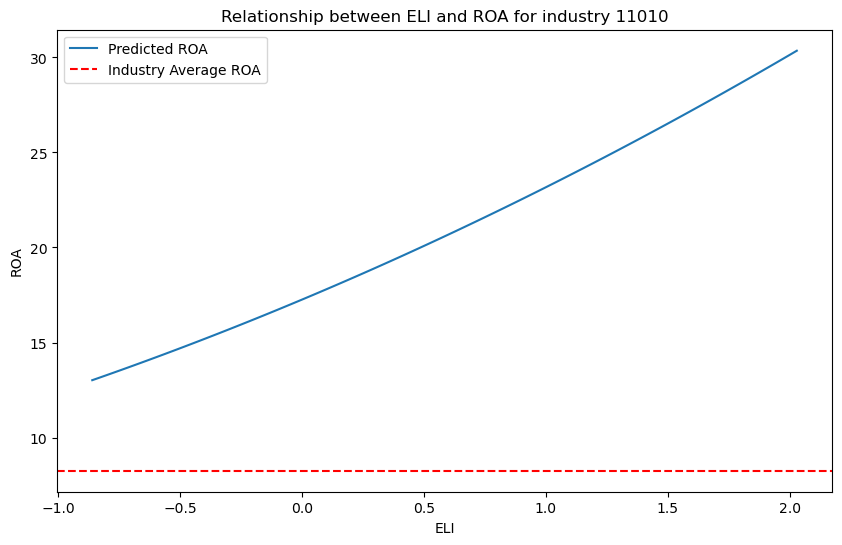

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


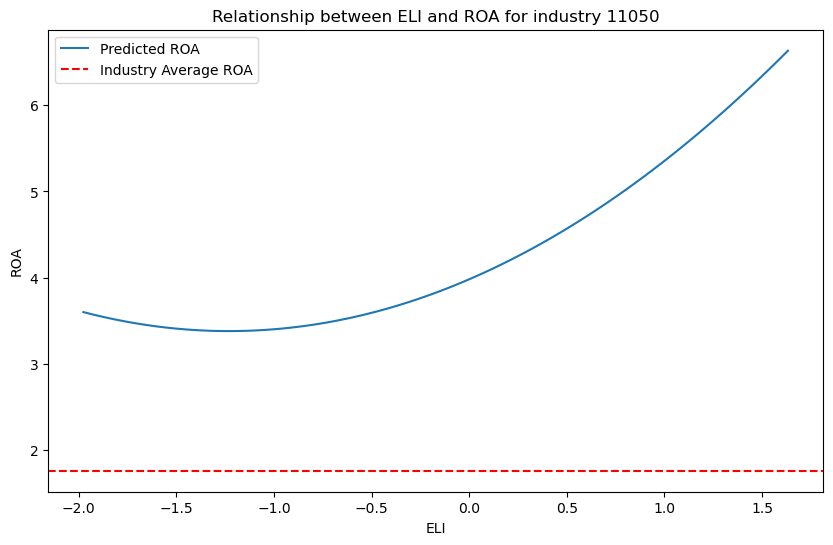

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


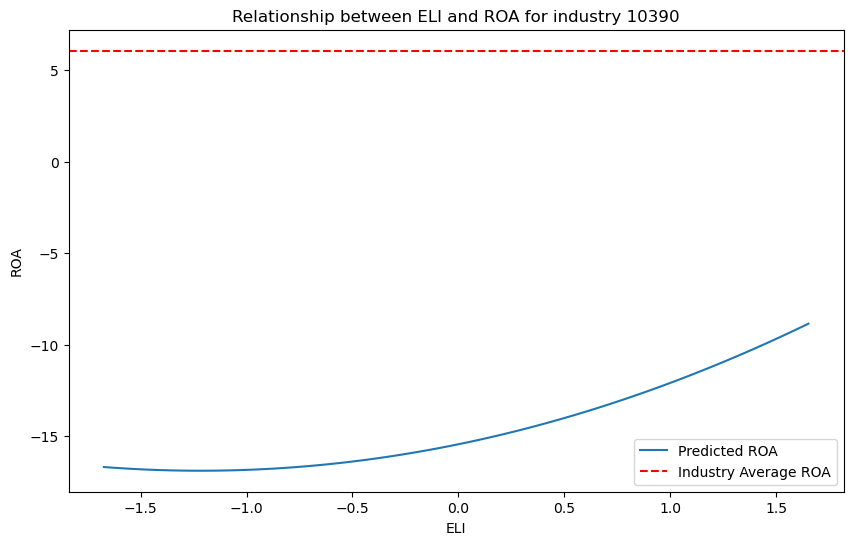

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


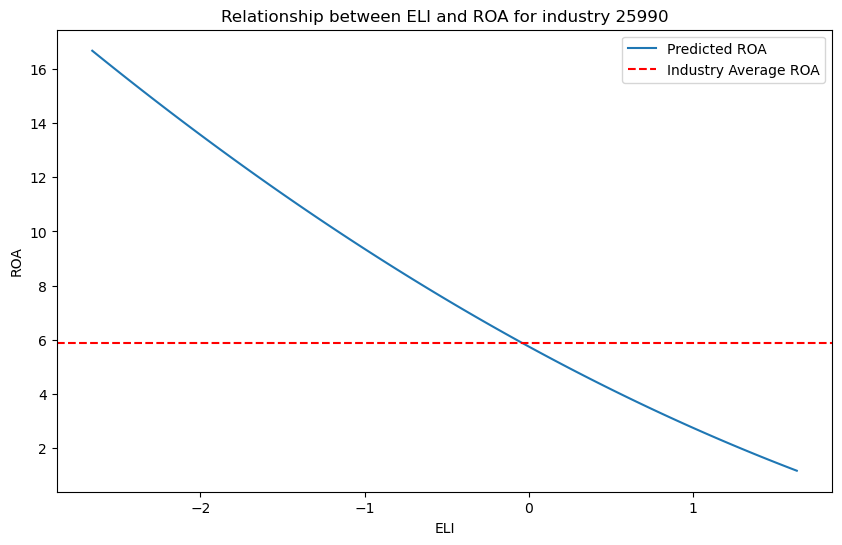

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


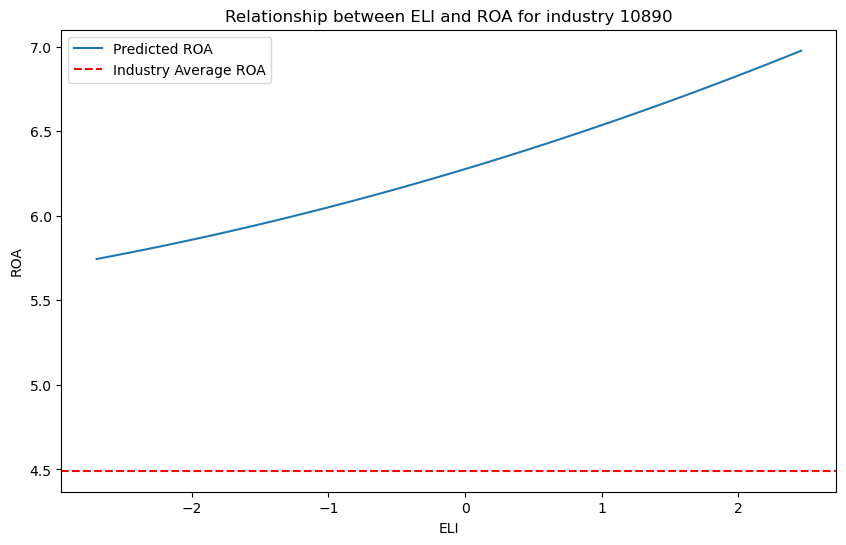

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


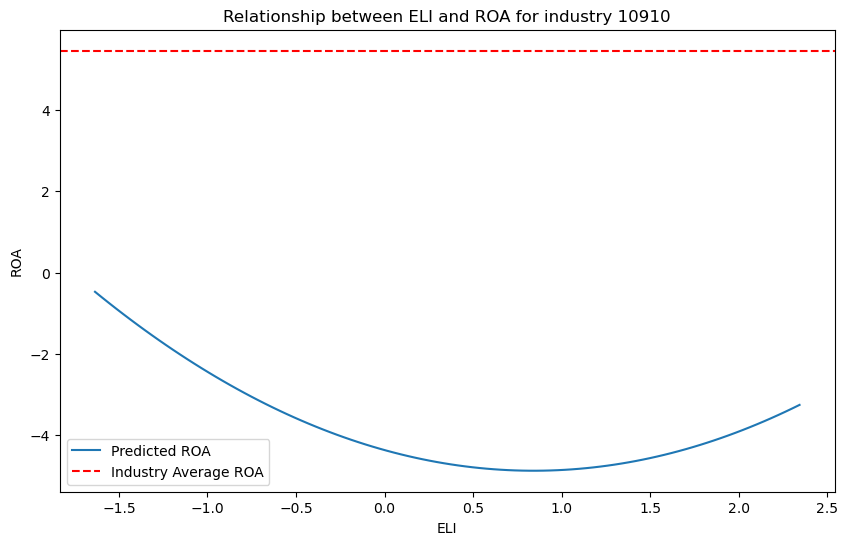

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


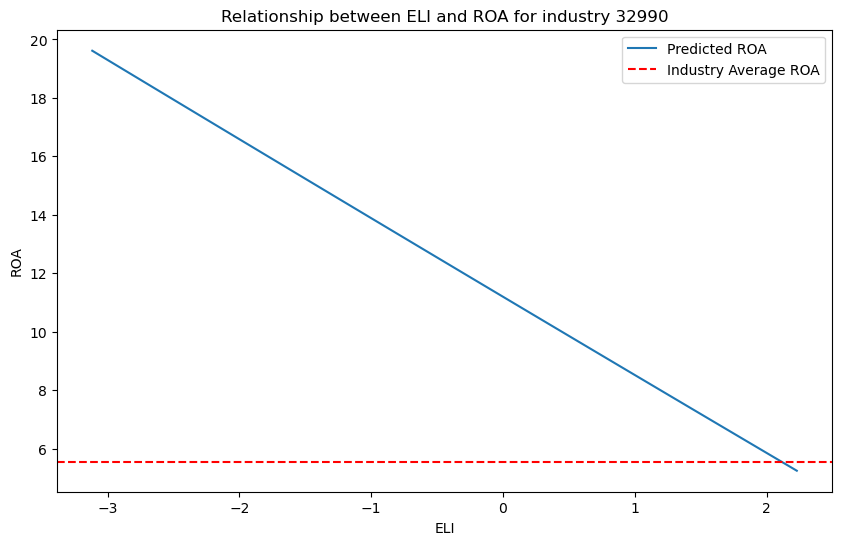

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


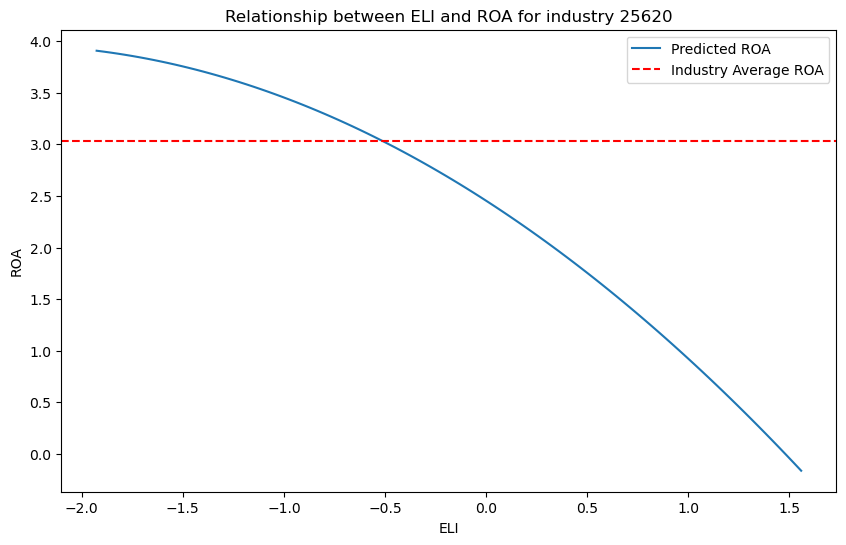

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


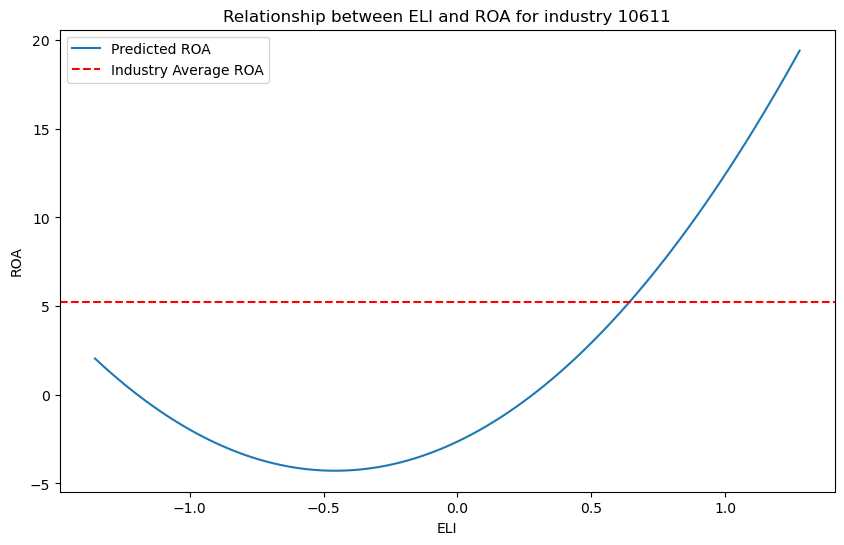

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


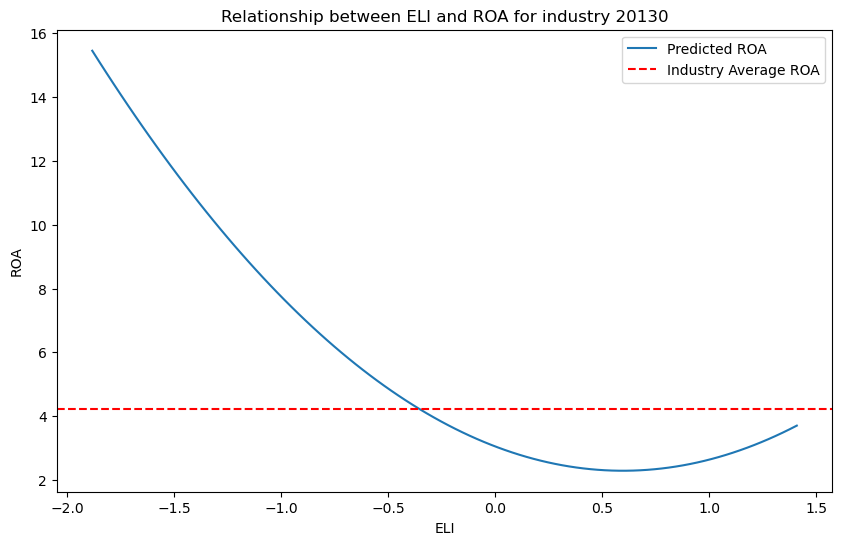

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


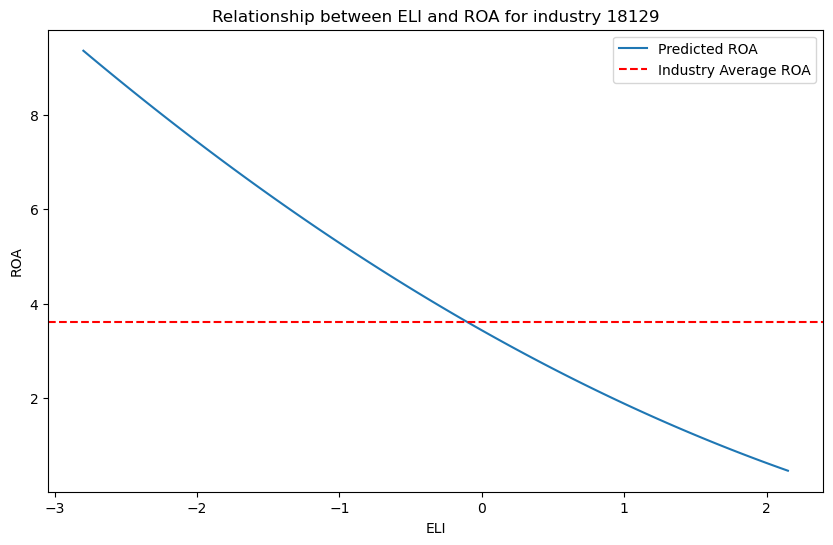

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


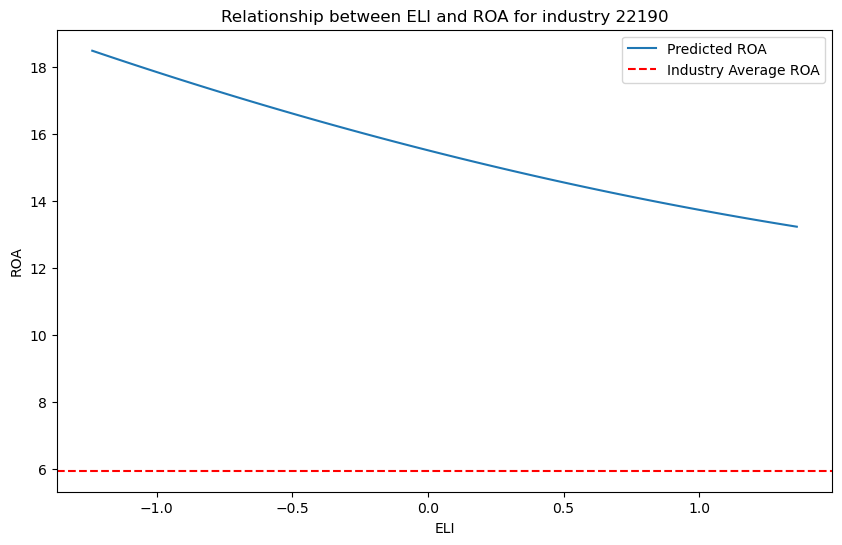

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


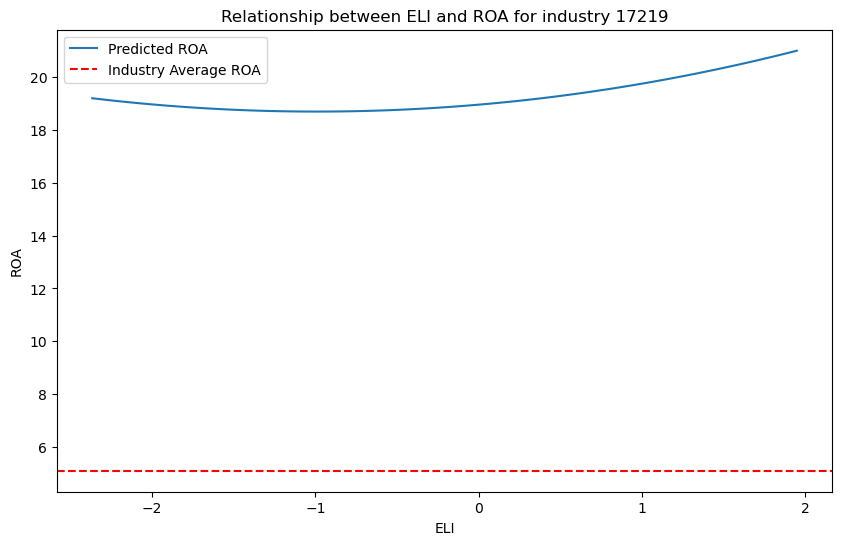

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


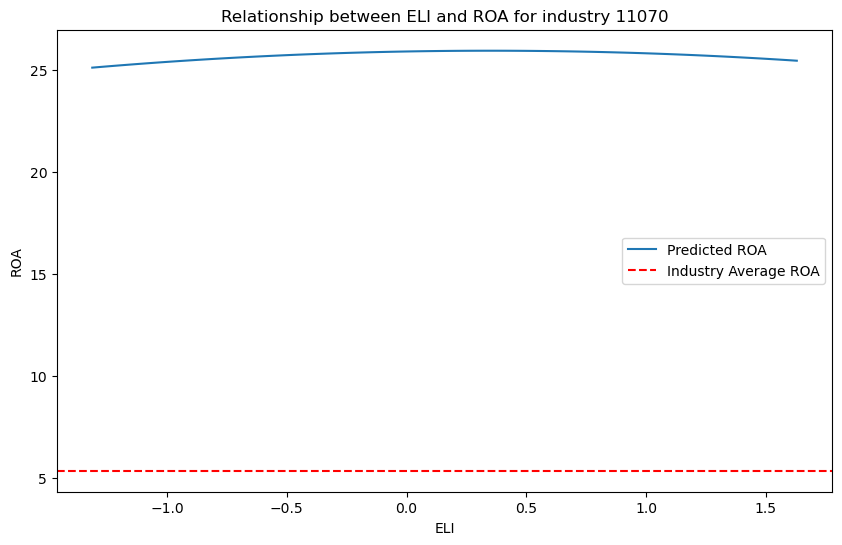

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


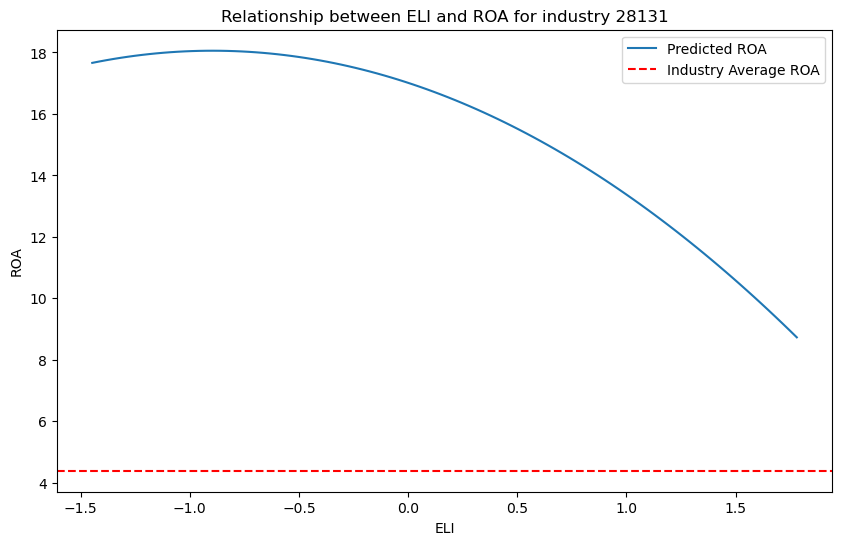

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


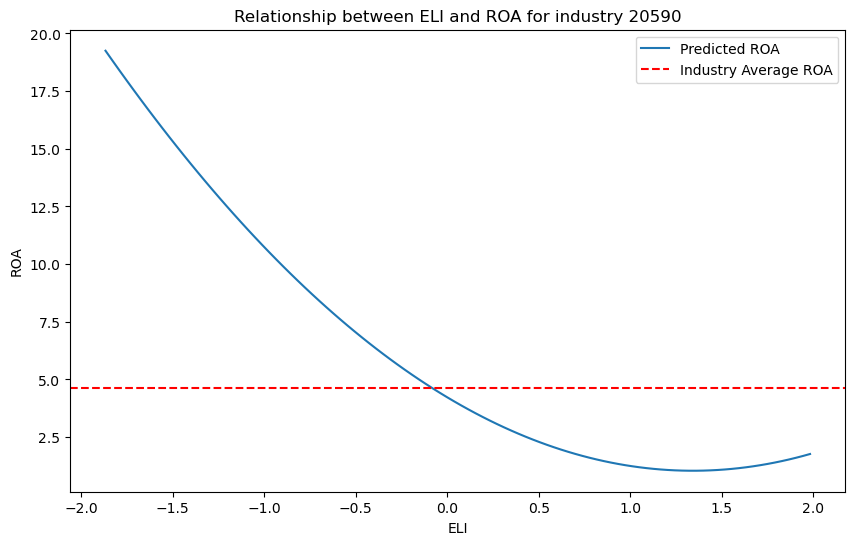

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


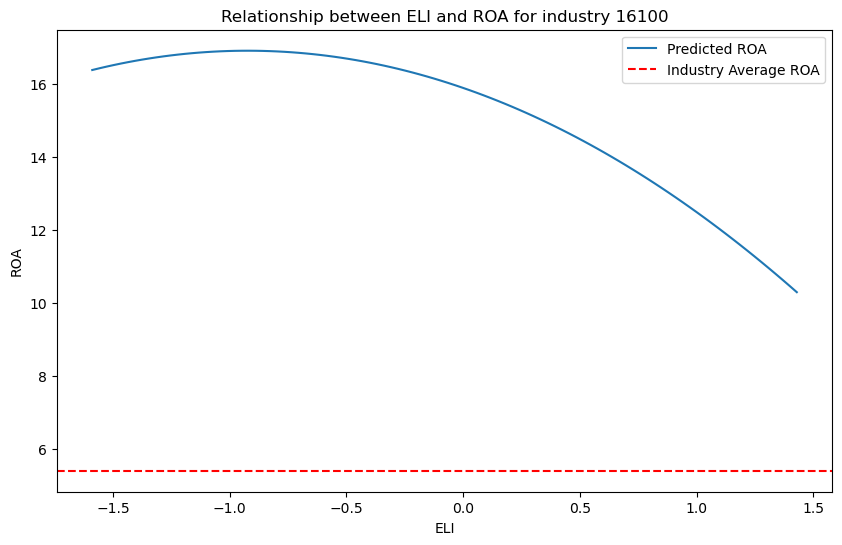

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


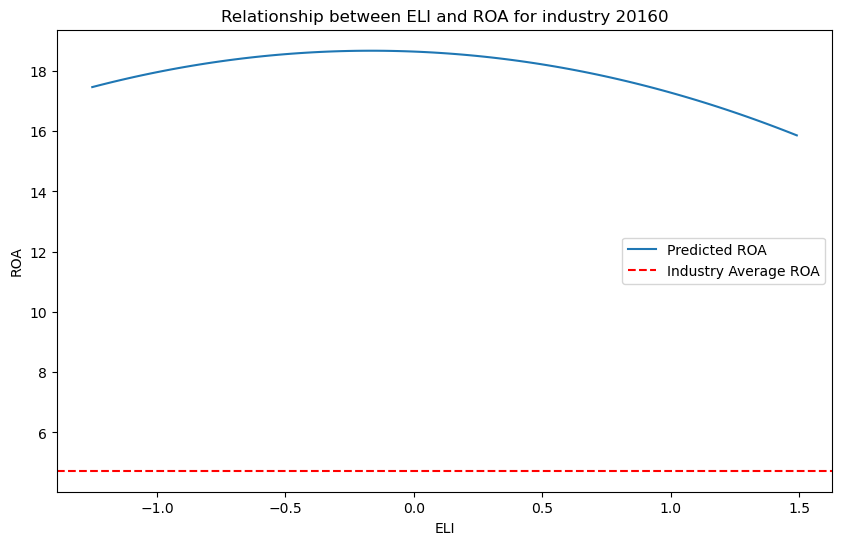

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


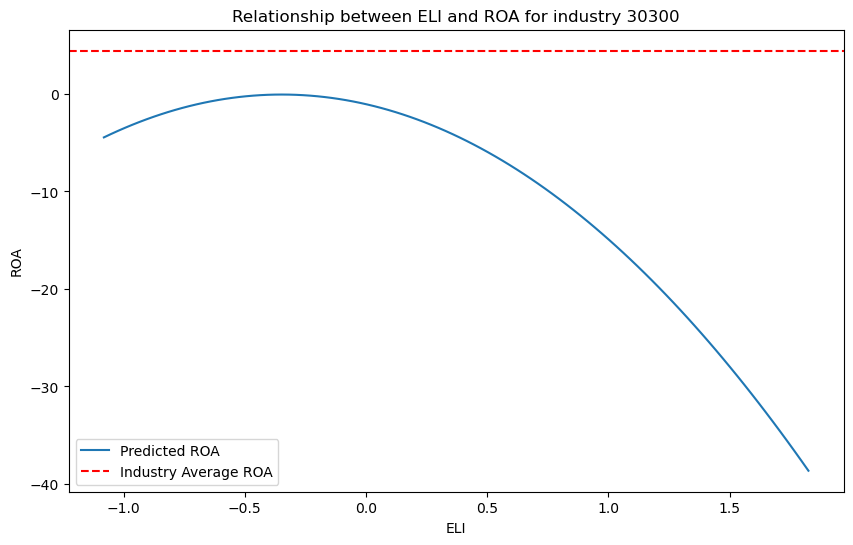

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


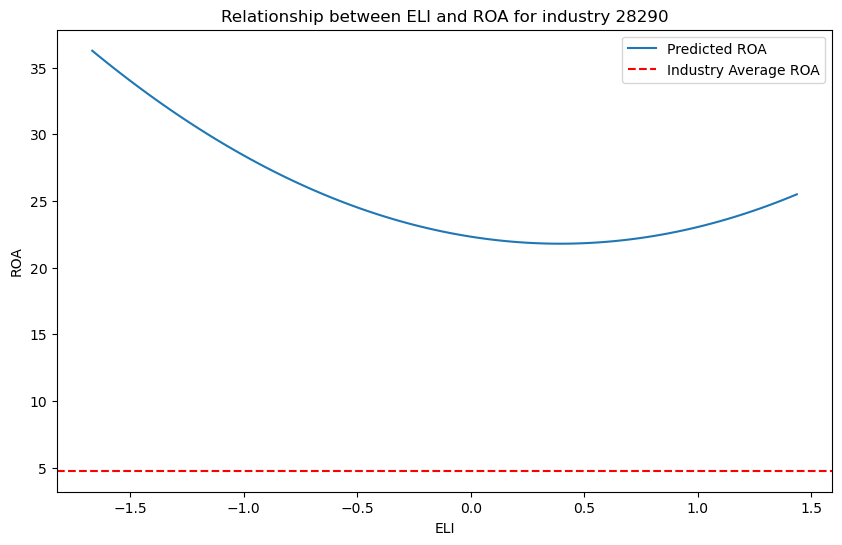

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


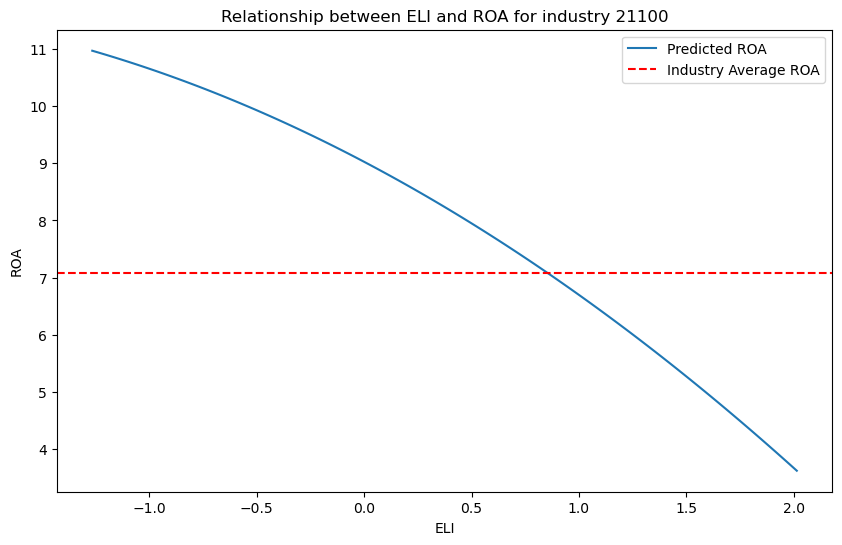

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


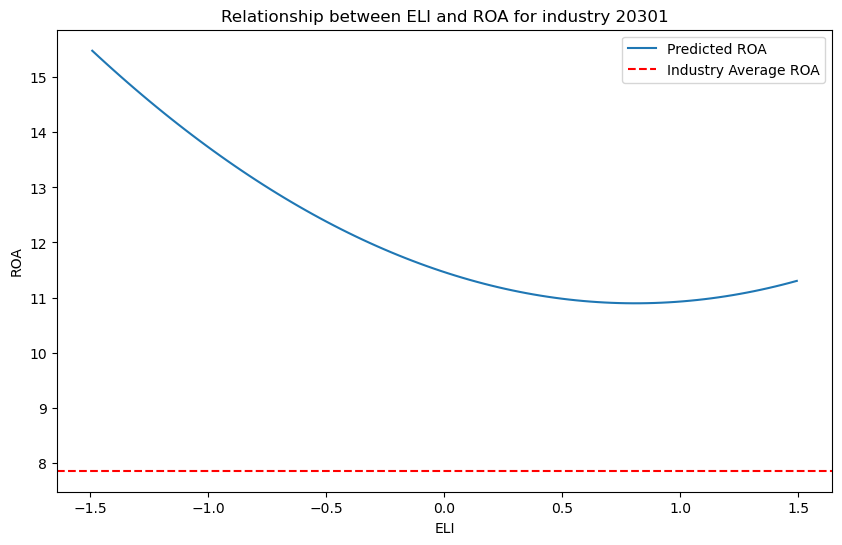

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


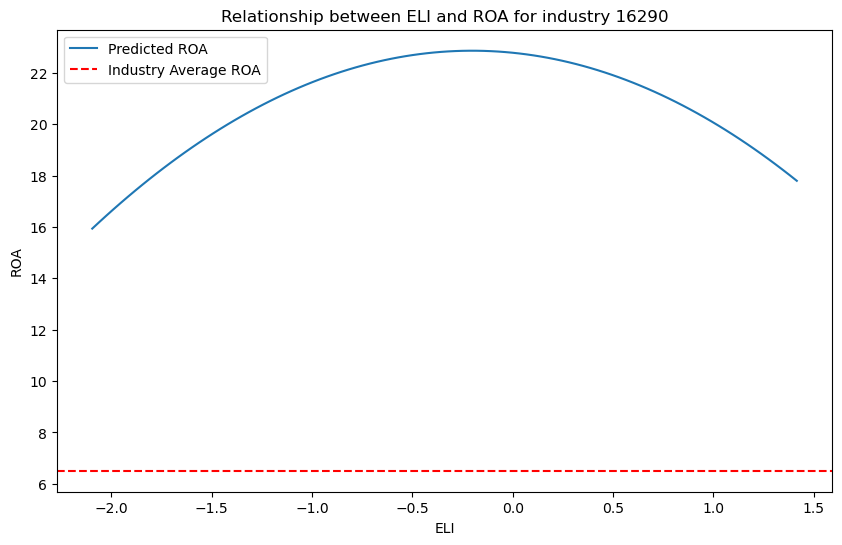

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


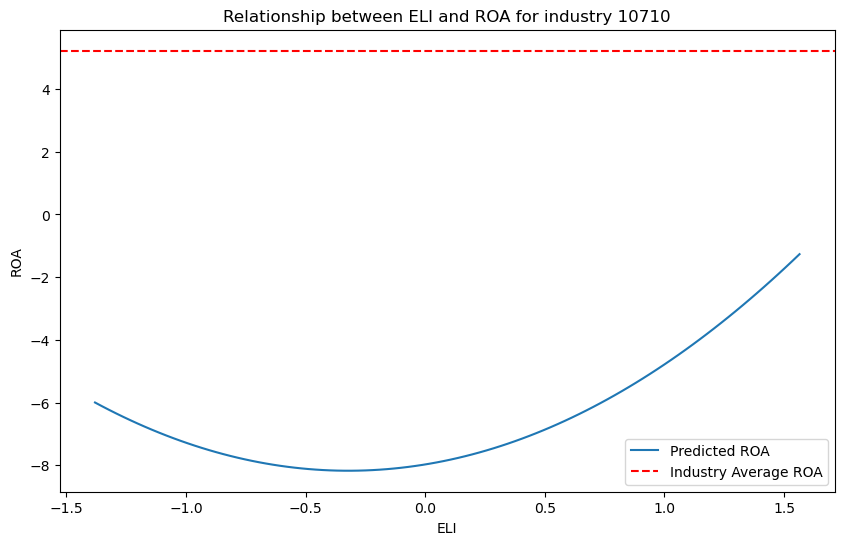

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


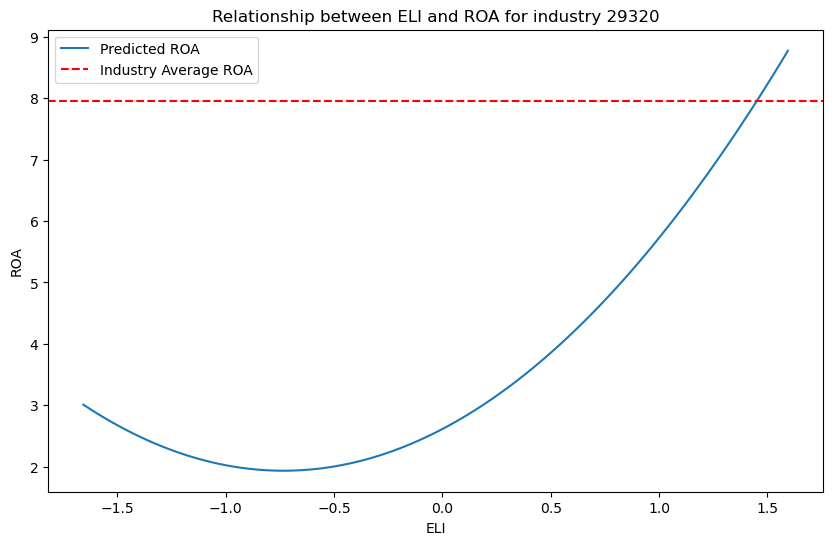

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


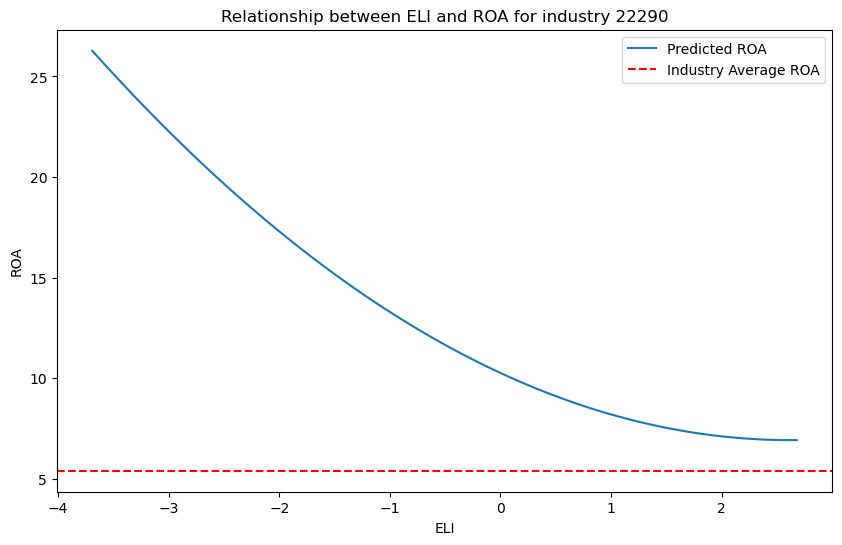

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


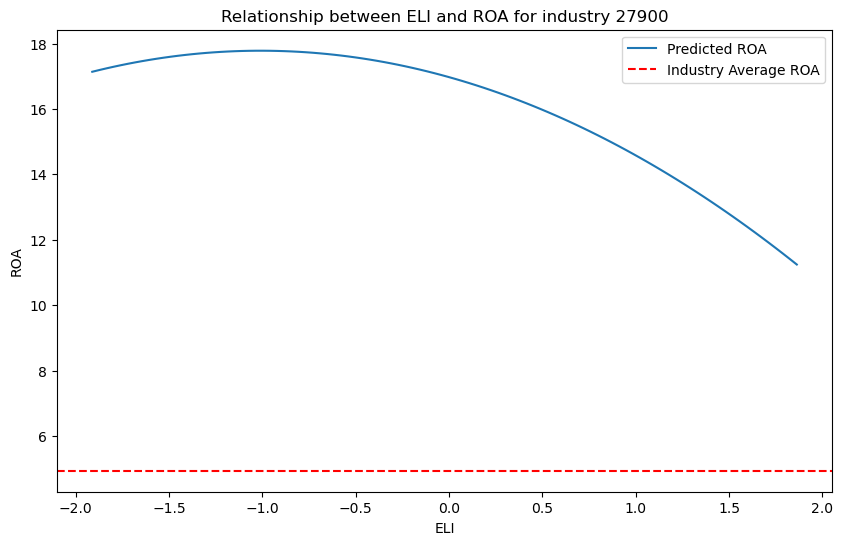

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


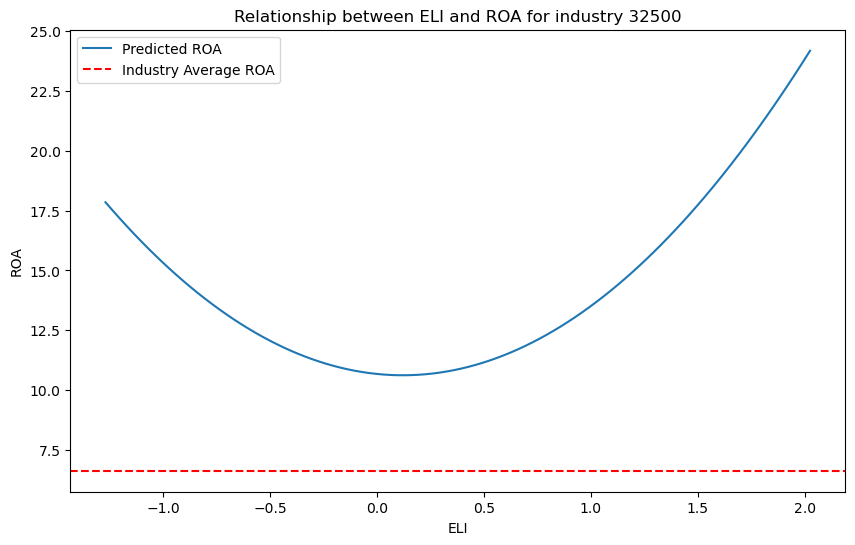

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


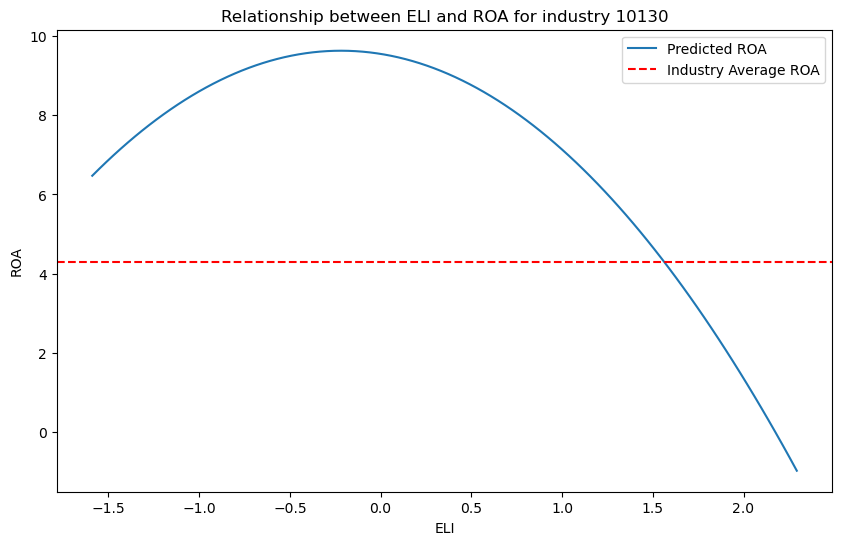

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


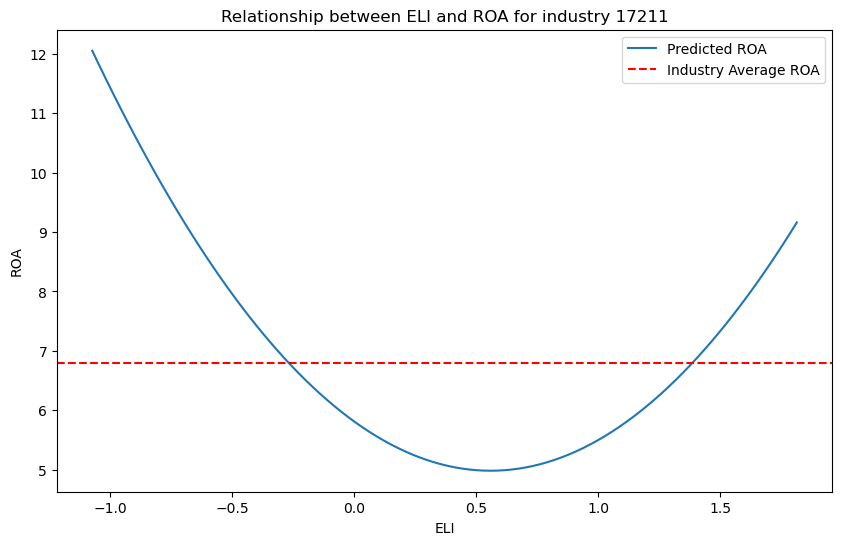

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


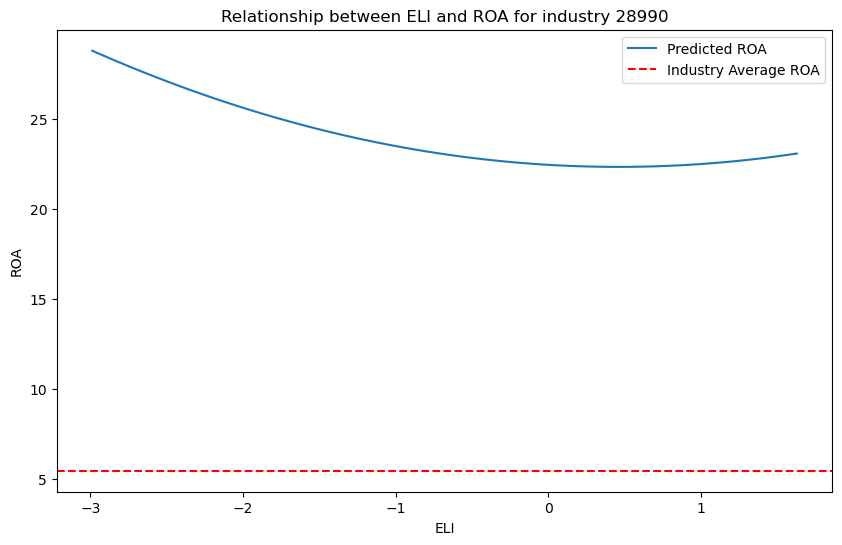

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


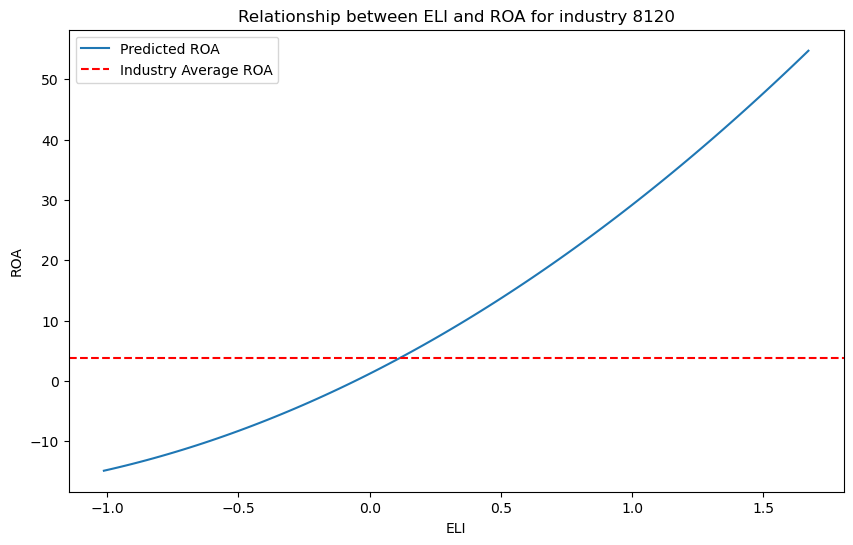

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


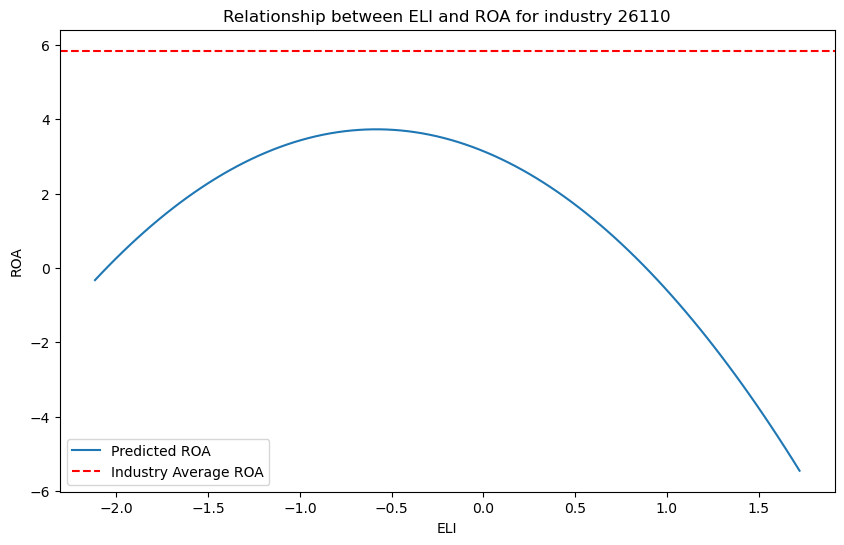

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


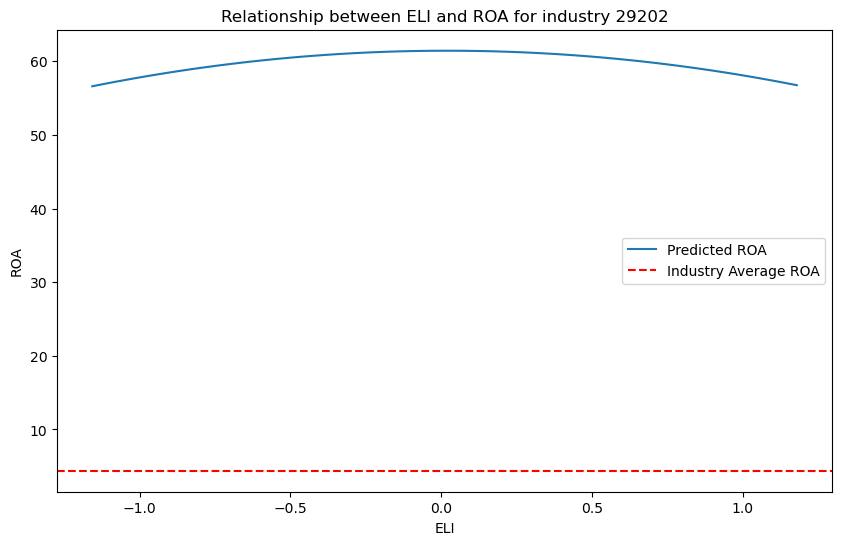

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


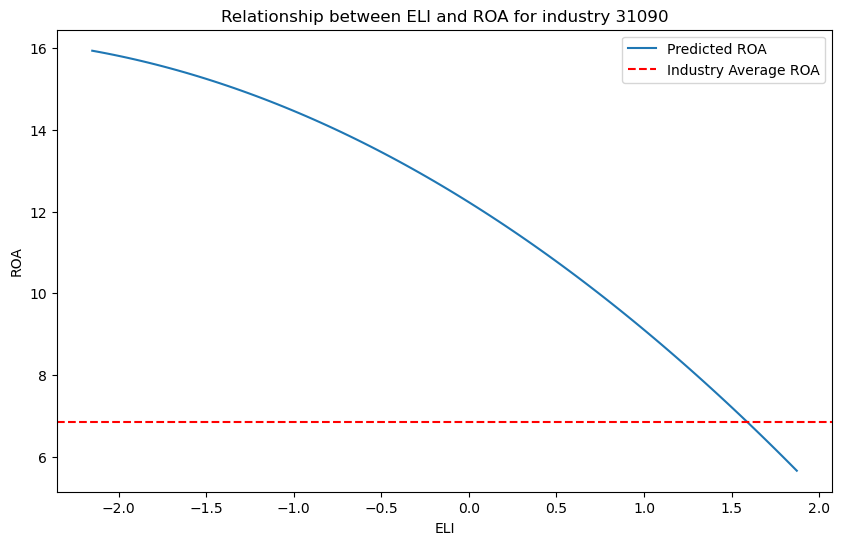

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


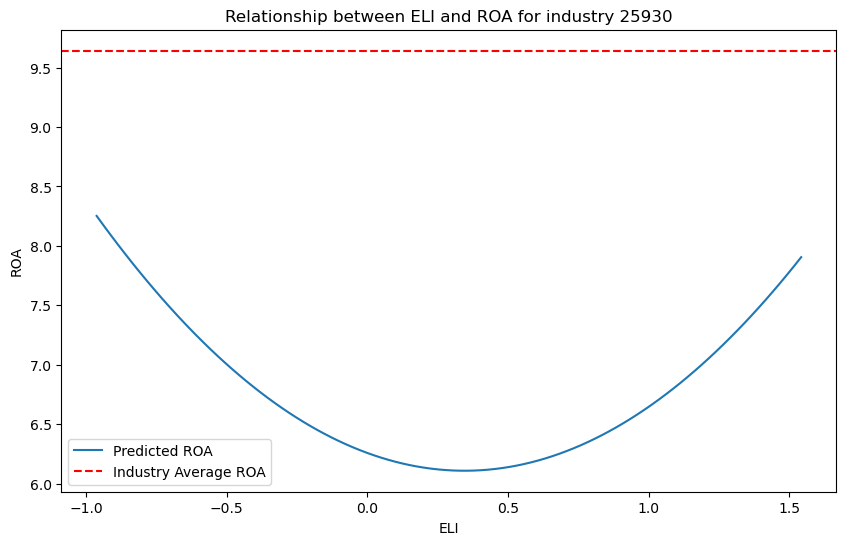

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


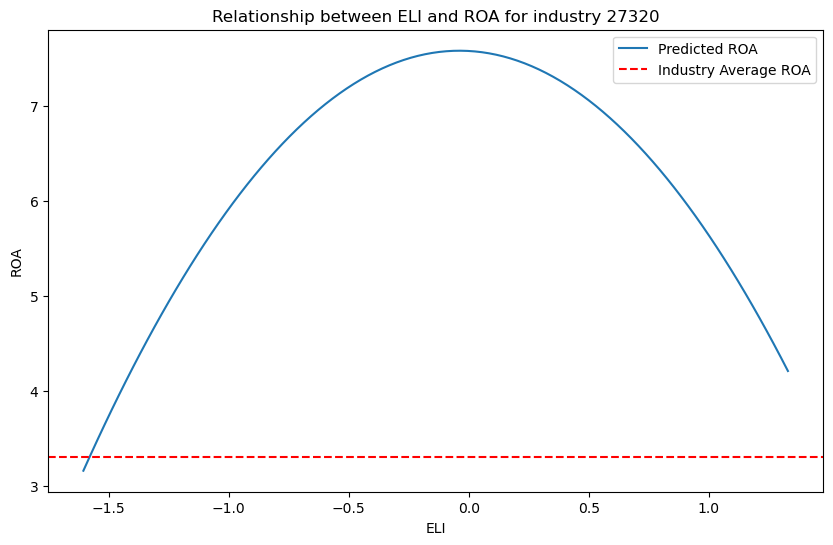

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


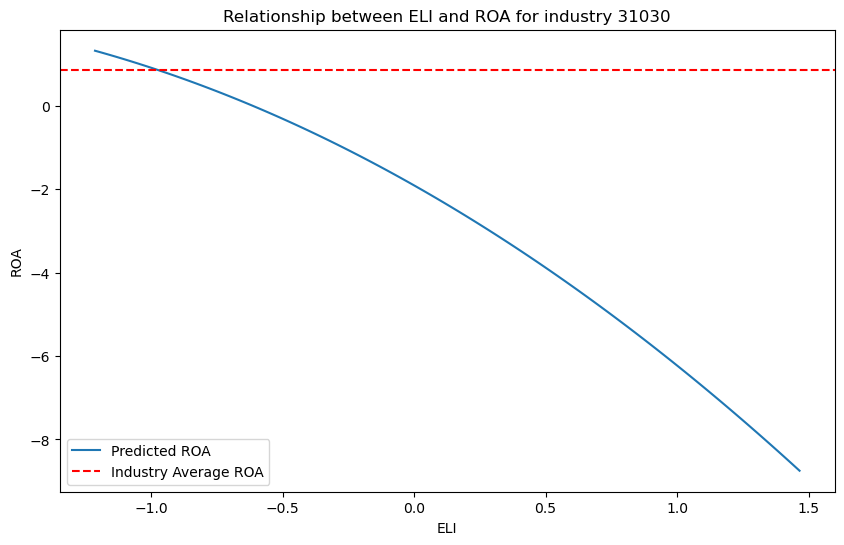

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


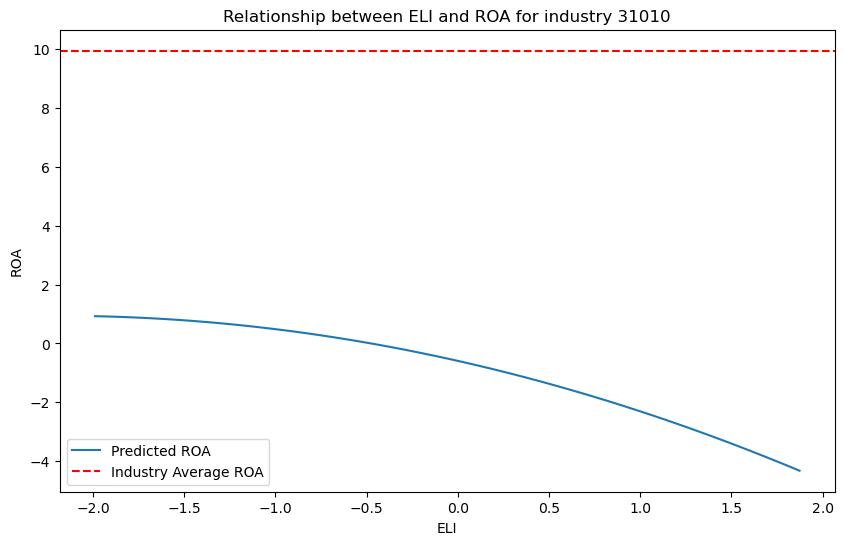

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


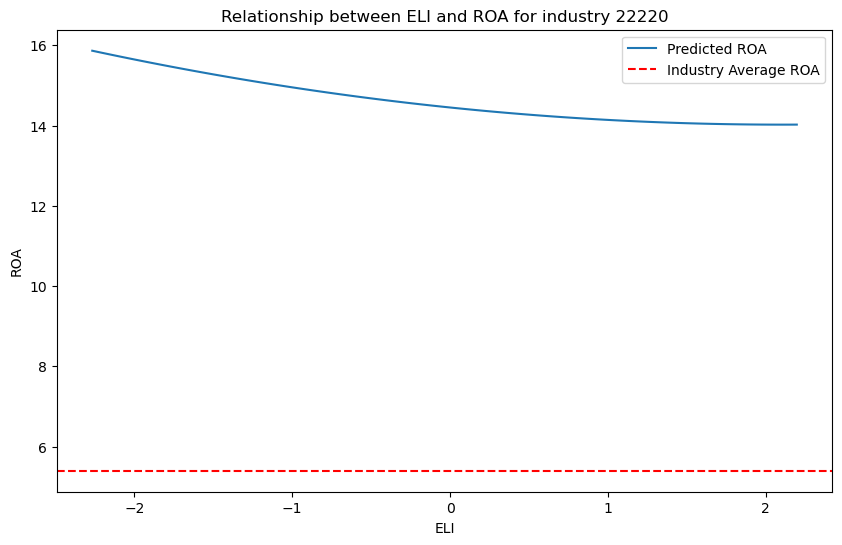

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


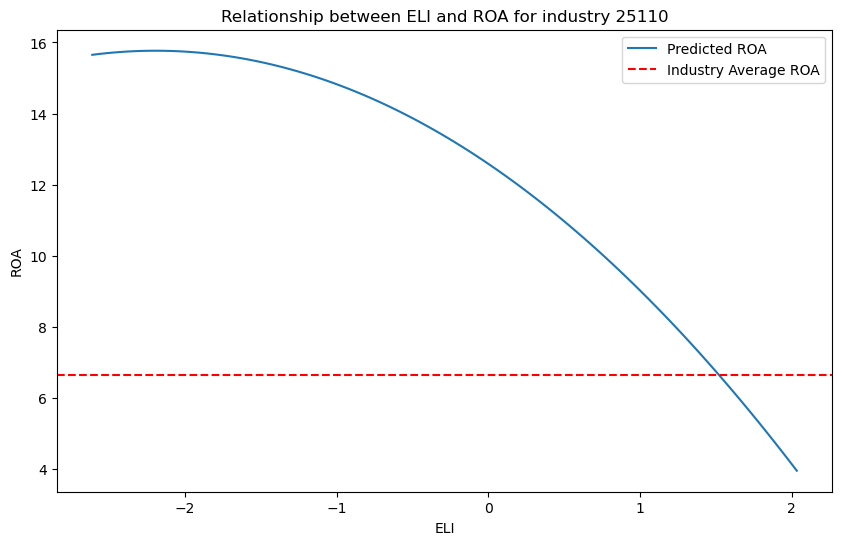

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


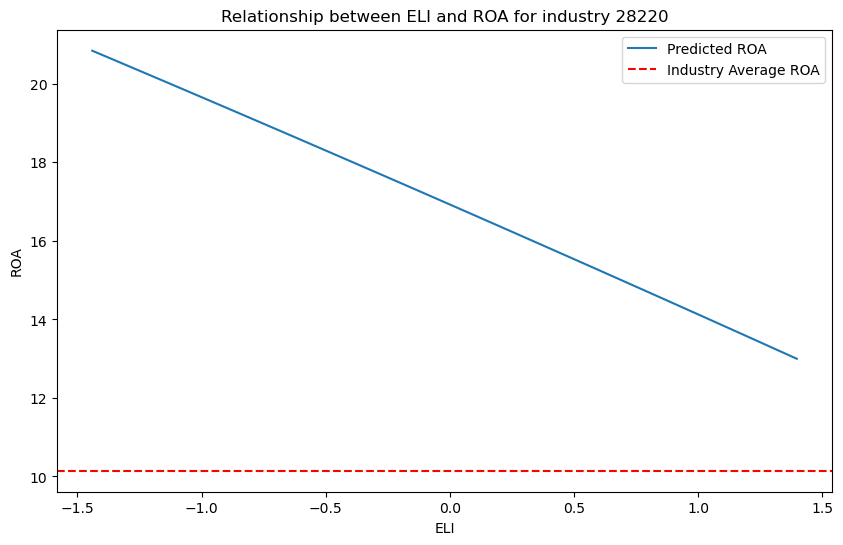

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


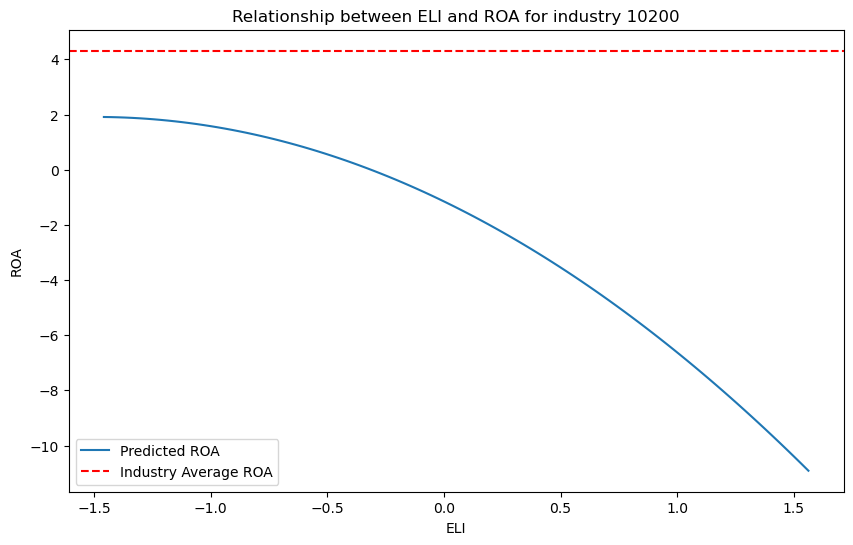

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


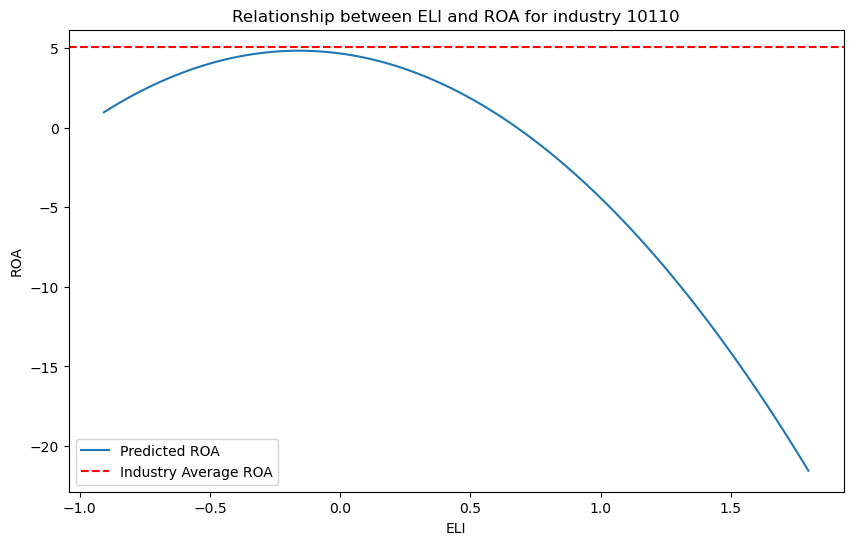

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


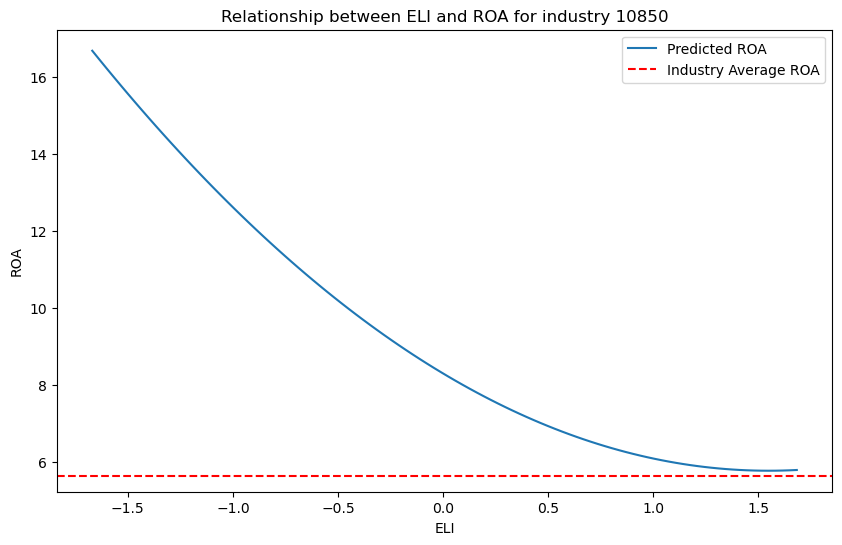

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


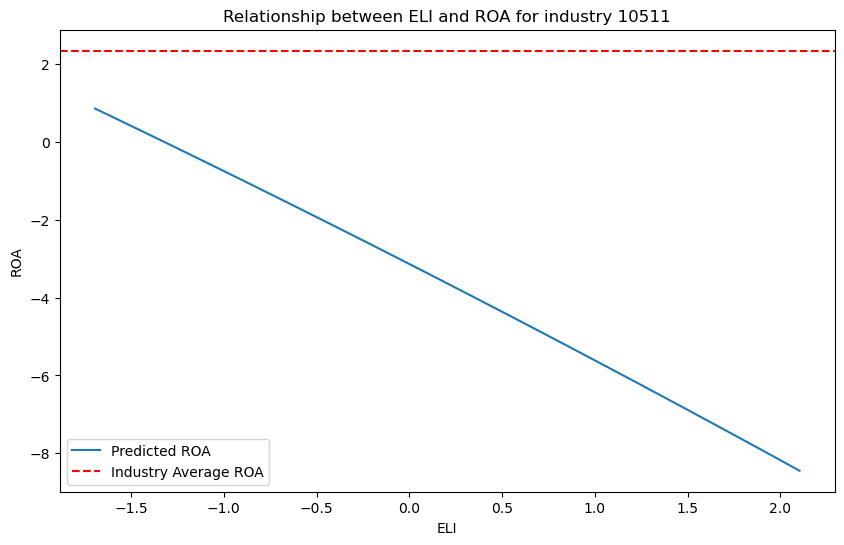

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


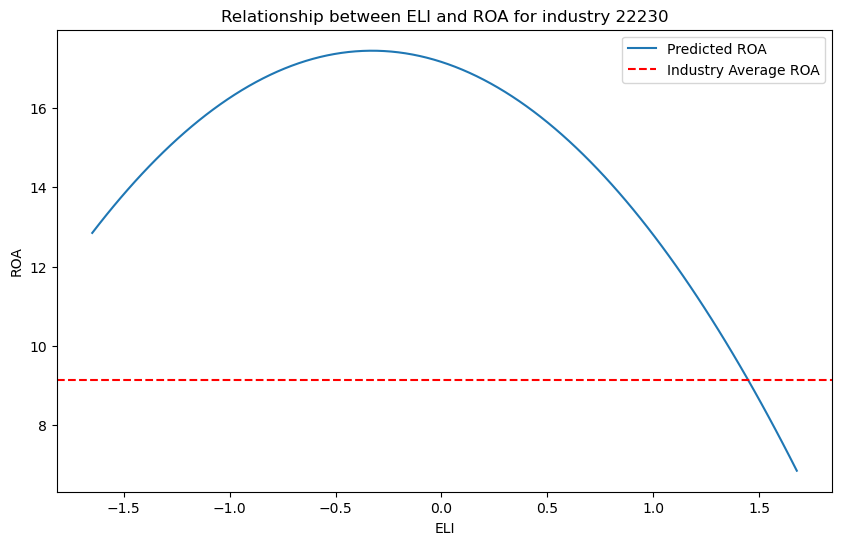

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


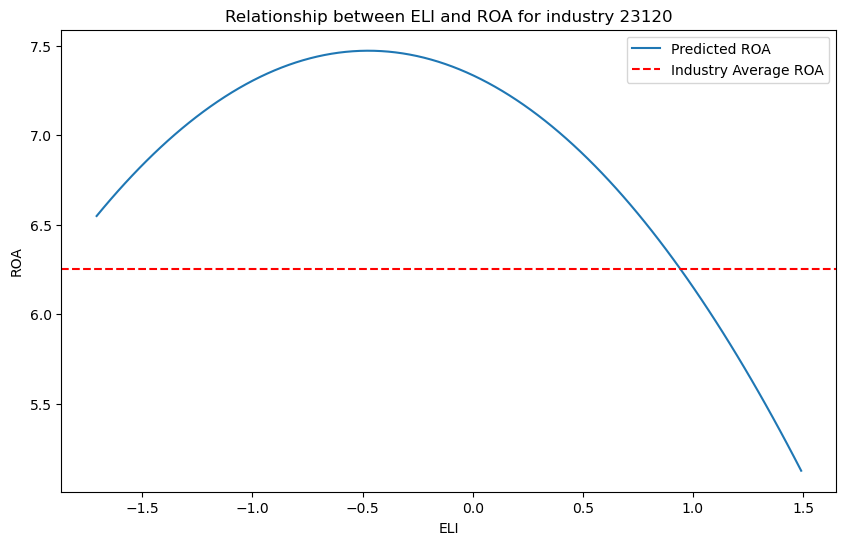

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


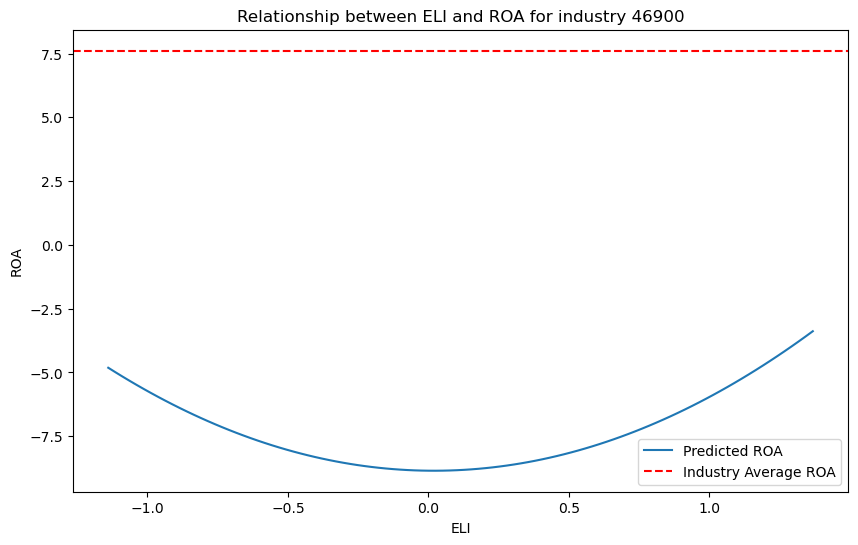

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/3306568058.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_ROA = results_df_ROA.append({


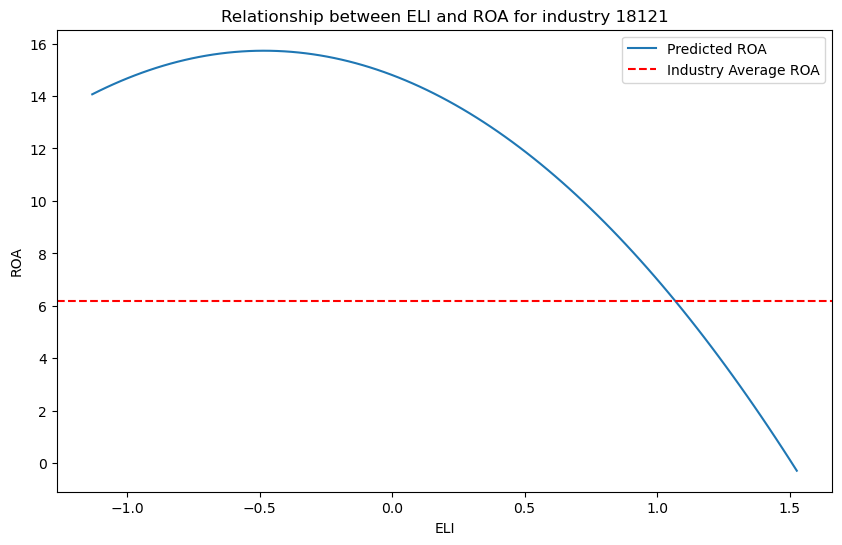

    Industry   ELI_coef  ELI_square_coef  ELI_pvalue  ELI_square_pvalue  \
0    11010.0   5.382138         0.527184    0.025932           0.838468   
1    11050.0   0.975537         0.396241    0.376188           0.625552   
2    10390.0   2.379219         0.976743    0.276894           0.438013   
3    25990.0  -3.300140         0.302934    0.000131           0.521571   
4    10890.0   0.242927         0.016948    0.751506           0.967078   
5    10910.0  -1.207154         0.717339    0.249458           0.228434   
6    32990.0  -2.683970         0.005753    0.000031           0.983673   
7    25620.0  -1.265680        -0.265305    0.276556           0.748379   
8    10611.0   7.196142         7.872641    0.104816           0.060063   
9    20130.0  -2.553137         2.138068    0.074223           0.113255   
10   18129.0  -1.703523         0.148217    0.004375           0.644809   
11   22190.0  -2.057224         0.278704    0.052285           0.772985   
12   17219.0   0.528577  

In [144]:
# Create an empty DataFrame to store the regression results
results_df_ROA = pd.DataFrame(columns=['Industry', 'ELI_coef', 'ELI_square_coef', 'ELI_pvalue', 'ELI_square_pvalue', 'Industry_avg_ROA', 'Max_ROA', 'ELI_at_Max_ROA','R2'])
df_eli_ROA_reg.reset_index(inplace= True)

df_eli_ROA_reg.set_index(['PrimaryUKSIC2007code', 'Index1'], inplace=True)
industry_codes = df_eli_ROA_reg.index.get_level_values('PrimaryUKSIC2007code').unique()
df_eli_ROA_reg['ELI_square'] = df_eli_ROA_reg['ELI'] ** 2

#Defin the independent varibles 
exog_vars = ['ELI','ELI_square','Firm_growth', 'Financial_leverage', 'Liquidity','Short_term_financing']

# Run Fixed effect regressin

# Loop over industry codes
for code in industry_codes:
    # Subset DataFrame for the current industry
    df_subset = df_eli_ROA_reg[df_eli_ROA_reg.index.get_level_values('PrimaryUKSIC2007code') == code]
    
    # Reset the index and set a new MultiIndex with 'Company_name' and 'Index1'
    df_subset.reset_index(inplace=True)
    df_subset.set_index(['Company_name', 'Index1'], inplace=True)
    
    # Run the regressin
    exog = sm.add_constant(df_subset[exog_vars])
    mod = PanelOLS(df_subset['ROA'], exog, entity_effects=True, time_effects=True)
    res = mod.fit()
    
    # Calculate the industry avg ROS
    industry_avg_roa = df_subset['ROA'].mean()
    
    # Calculate the ELI value that maximizes ROS
    eli_at_max_roa = -res.params['ELI'] / (2 * res.params['ELI_square'])
    
    # Calculate the maximum ROS
    max_roa = res.params['const'] + res.params['ELI']*eli_at_max_roa + res.params['ELI_square']*eli_at_max_roa**2
    
    # Store the regression results in the DataFrame
    results_df_ROA = results_df_ROA.append({
    'Industry': code,
    'ELI_coef': res.params['ELI'],
    'ELI_square_coef': res.params['ELI_square'],
    'ELI_pvalue': res.pvalues['ELI'],
    'ELI_square_pvalue': res.pvalues['ELI_square'],
    'Industry_avg_ROA': industry_avg_roa,
    'Max_ROA': max_roa,
    'ELI_at_Max_ROA': eli_at_max_roa,
    'R2': res.rsquared}, ignore_index=True)
    
    
    # Generate a range of ELI values
    eli_values = np.linspace(df_subset['ELI'].min(), df_subset['ELI'].max(), 100)

    # Calculate predicted ROA values based on the regression results
    predicted_roa = res.params['const'] + res.params['ELI']*eli_values + res.params['ELI_square']*eli_values**2

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(eli_values, predicted_roa, label='Predicted ROA')
    plt.axhline(y=industry_avg_roa, color='r', linestyle='--', label='Industry Average ROA')
    plt.xlabel('ELI')
    plt.ylabel('ROA')
    plt.title(f'Relationship between ELI and ROA for industry {code}')
    plt.legend()
    plt.show()

# Print the DataFrame with the regression results
print(results_df_ROA)


In [145]:
import pandas as pd

# Create a DataFrame for the categories
categories_df = pd.DataFrame(columns=[
    'Category', 'Number_of_Industries', 'Avg_Beta_ELI', 'Avg_Beta_ELIsquare', 'Avg_R2'
])

# Introducing a threshold to consider a coefficient effectively zero
threshold = 1e-6

# creat Dictionary to hold intermediary results
categories = {
    'ELI_0_ELIsquare_0': [],
    'ELI_positive_ELIsquare_0': [],
    'ELI_negative_ELIsquare_0': [],
    'U_shaped': [],
    'ELI_0_ELIsquare_negative': [],
    'ELI_negative_ELIsquare_negative': [],
    'ELI_positive_ELIsquare_positive': [],
    'ELI_negative_ELIsquare_positive': [],
    'ELI_0_ELIsquare_positive': []
}

# Categorize based on the coefficients
for index, row in results_df_ROA.iterrows():
    if abs(row['ELI_coef']) < threshold and abs(row['ELI_square_coef']) < threshold:
        categories['ELI_0_ELIsquare_0'].append(row)
    elif row['ELI_coef'] > threshold and abs(row['ELI_square_coef']) < threshold:
        categories['ELI_positive_ELIsquare_0'].append(row)
    elif row['ELI_coef'] < -threshold and abs(row['ELI_square_coef']) < threshold:
        categories['ELI_negative_ELIsquare_0'].append(row)
    elif row['ELI_coef'] > threshold and row['ELI_square_coef'] < -threshold:
        categories['U_shaped'].append(row)
    elif row['ELI_coef'] < -threshold and row['ELI_square_coef'] < -threshold:
        categories['ELI_negative_ELIsquare_negative'].append(row)
    elif abs(row['ELI_coef']) < threshold and row['ELI_square_coef'] < -threshold:
        categories['ELI_0_ELIsquare_negative'].append(row)
    elif row['ELI_coef'] > threshold and row['ELI_square_coef'] > threshold:
        categories['ELI_positive_ELIsquare_positive'].append(row)
    elif row['ELI_coef'] < -threshold and row['ELI_square_coef'] > threshold:
        categories['ELI_negative_ELIsquare_positive'].append(row)
    elif abs(row['ELI_coef']) < threshold and row['ELI_square_coef'] > threshold:
        categories['ELI_0_ELIsquare_positive'].append(row)

# Compute the required statistics and populate the categories_df
for key, rows in categories.items():
    avg_beta_eli = sum([row['ELI_coef'] for row in rows]) / len(rows) if rows else 0
    avg_beta_elisquare = sum([row['ELI_square_coef'] for row in rows]) / len(rows) if rows else 0
    avg_r2 = sum([row['R2'] for row in rows]) / len(rows) if rows else 0
    
    categories_df = categories_df.append({
        'Category': key,
        'Number_of_Industries': len(rows),
        'Avg_Beta_ELI': avg_beta_eli,
        'Avg_Beta_ELIsquare': avg_beta_elisquare,
        'Avg_R2': avg_r2
    }, ignore_index=True)

    #Print the categories
print(categories_df)

categories_df.to_excel("ELI and ROA_category results.xlsx", index=False)

                          Category Number_of_Industries Avg_Beta_ELI  \
0                ELI_0_ELIsquare_0                    0            0   
1         ELI_positive_ELIsquare_0                    0            0   
2         ELI_negative_ELIsquare_0                    0            0   
3                         U_shaped                    2     0.174377   
4         ELI_0_ELIsquare_negative                    0            0   
5  ELI_negative_ELIsquare_negative                   22    -2.147745   
6  ELI_positive_ELIsquare_positive                    9     4.643818   
7  ELI_negative_ELIsquare_positive                   17    -1.994873   
8         ELI_0_ELIsquare_positive                    0            0   

  Avg_Beta_ELIsquare    Avg_R2  
0                  0         0  
1                  0         0  
2                  0         0  
3          -1.893715   0.36198  
4                  0         0  
5          -1.725186  0.302246  
6           2.142225  0.220726  
7           1.3

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/671875221.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  categories_df = categories_df.append({
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/671875221.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  categories_df = categories_df.append({
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/671875221.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  categories_df = categories_df.append({
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_25306/671875221.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  categories_df =

In [146]:
# Create a DataaFrame with rows where both p-values are less than 0.1
significant_results_df = results_df_ROA[(results_df_ROA['ELI_pvalue'] <= 0.4) & (results_df_ROA['ELI_square_pvalue'] <= 0.4)]

# Print the DataFrame
significant_results_df

Industry   ELI_coef  ELI_square_coef  ELI_pvalue  ELI_square_pvalue  \
5    10910.0  -1.207154         0.717339    0.249458           0.228434   
8    10611.0   7.196142         7.872641    0.104816           0.060063   
9    20130.0  -2.553137         2.138068    0.074223           0.113255   
14   28131.0  -2.334101        -1.302523    0.112851           0.154597   
15   20590.0  -4.746970         1.769717    0.040696           0.130339   
16   16100.0  -2.207715        -1.195175    0.228307           0.221617   
19   28290.0  -2.683140         3.409422    0.277748           0.076216   
24   29320.0   1.852324         1.263452    0.345522           0.383678   
25   22290.0  -2.547969         0.485850    0.000070           0.067870   
29   17211.0  -2.969251         2.653331    0.007694           0.012720   
31    8120.0  21.988932         6.019833    0.000001           0.042454   
32   26110.0  -2.014985        -1.726167    0.057819           0.064922   
34   31090.0  -2.676917        -0.443587    0.011994           0.398797   
40   25110.0  -2.900485        -0.660997    0.001781           0.192512   
42   10200.0  -4.102589        -1.373508    0.003364           0.245715   
46   22230.0  -1.726531        -2.633442    0.259516           0.005325   
49   18121.0  -3.830601        -3.961784    0.001345           0.000099   

    Industry_avg_ROA    Max_ROA  ELI_at_Max_ROA        R2  
5           5.457092  -4.870538        0.841412  0.240076  
8           5.237308  -4.283051       -0.457035  0.375019  
9           4.214054   2.291207        0.597066  0.233395  
14          4.388578  18.057799       -0.895992  0.697861  
15          4.640196   1.045325        1.341166  0.161573  
16          5.405428  16.917313       -0.923595  0.278255  
19          4.775427  21.800728        0.393489  0.286721  
24          7.962968   1.931623       -0.733041  0.096796  
25          5.391295   6.913535        2.622176  0.273761  
29          6.792417   4.984456        0.559533  0.403370  
31          3.785739 -18.893930       -1.826374  0.588536  
32          5.846646   3.731174       -0.583659  0.184298  
34          6.854243  16.268124       -3.017354  0.275676  
40          6.648621  15.767949       -2.194022  0.249930  
42          4.313645   1.912527       -1.493471  0.460928  
46          9.144607  17.445751       -0.327809  0.533786  
49          6.193775  15.727451       -0.483444  0.575547

In [148]:
optimal_result=results_df_ROA[(results_df_ROA['ELI_coef'] > 0) & (results_df_ROA['ELI_square_coef'] < 0)]
optimal_result

Industry  ELI_coef  ELI_square_coef  ELI_pvalue  ELI_square_pvalue  \
13   11070.0  0.210730        -0.300010    0.913860           0.815298   
33   29202.0  0.138023        -3.487421    0.956302           0.080406   

    Industry_avg_ROA    Max_ROA  ELI_at_Max_ROA        R2  
13          5.355034  25.962013        0.351205  0.328617  
33          4.393797  61.437616        0.019789  0.395343